In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/train_data (1).csv')

In [4]:
df.head()

,0,1
0,"This film is absolutely awful, but nevertheles...",0
1,Well since seeing part's 1 through 3 I can hon...,0
2,I got to see this film at a preview and was da...,1
3,This adaptation positively butchers a classic ...,0
4,Råzone is an awful movie! It is so simple. It ...,0


In [5]:
df = df.rename(columns={'0': 'text'})

In [10]:
df = df.rename(columns={'1': 'label'})

In [11]:
df.head()

,text,label
0,"This film is absolutely awful, but nevertheles...",0
1,Well since seeing part's 1 through 3 I can hon...,0
2,I got to see this film at a preview and was da...,1
3,This adaptation positively butchers a classic ...,0
4,Råzone is an awful movie! It is so simple. It ...,0


In [12]:
df.isnull().sum()

,0
text,0
label,0


In [13]:
df['label'].value_counts()

,count
label,
0,12500
1,12500


In [14]:
# Check for duplicate valus
df.duplicated().sum()

np.int64(96)

In [15]:
# Removing Duplicates
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.shape

(24904, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

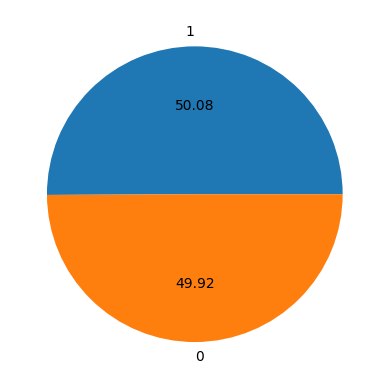

In [19]:
plt.pie(df['label'].value_counts(),labels=[1,0],autopct='%0.2f')
plt.show

In [20]:
import nltk

In [21]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [22]:
df['num_characters'] = df['text'].apply(len)

In [23]:
df.head()

,text,label,num_characters
0,"This film is absolutely awful, but nevertheles...",0,1676
1,Well since seeing part's 1 through 3 I can hon...,0,717
2,I got to see this film at a preview and was da...,1,1112
3,This adaptation positively butchers a classic ...,0,848
4,Råzone is an awful movie! It is so simple. It ...,0,1023


In [25]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

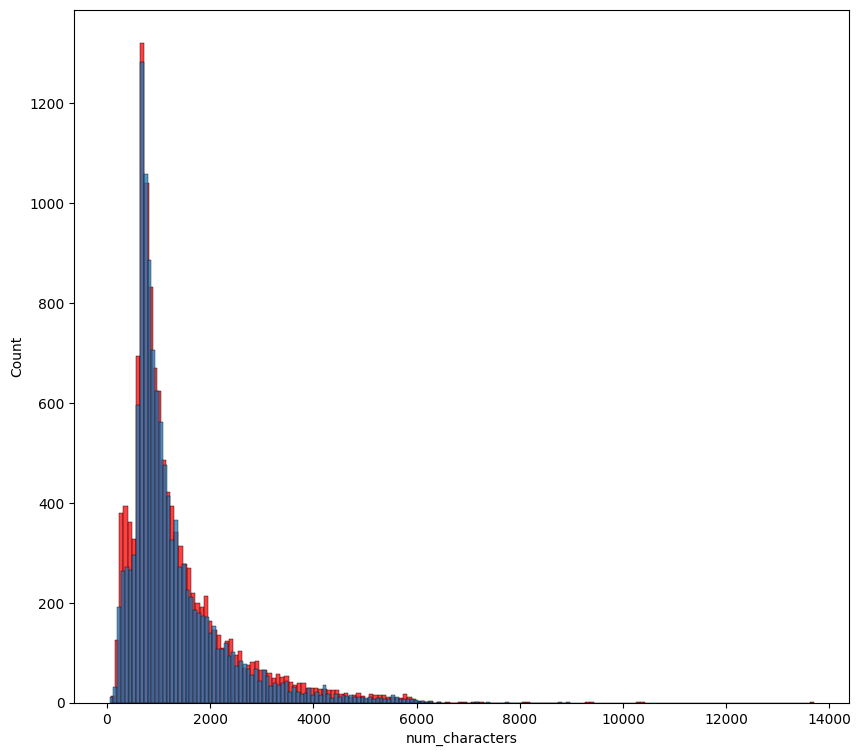

In [27]:
plt.figure(figsize=(10,9))
sns.histplot(df[df['label']==1]['num_characters'],color='red')
sns.histplot(df[df['label']==0]['num_characters'])

In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

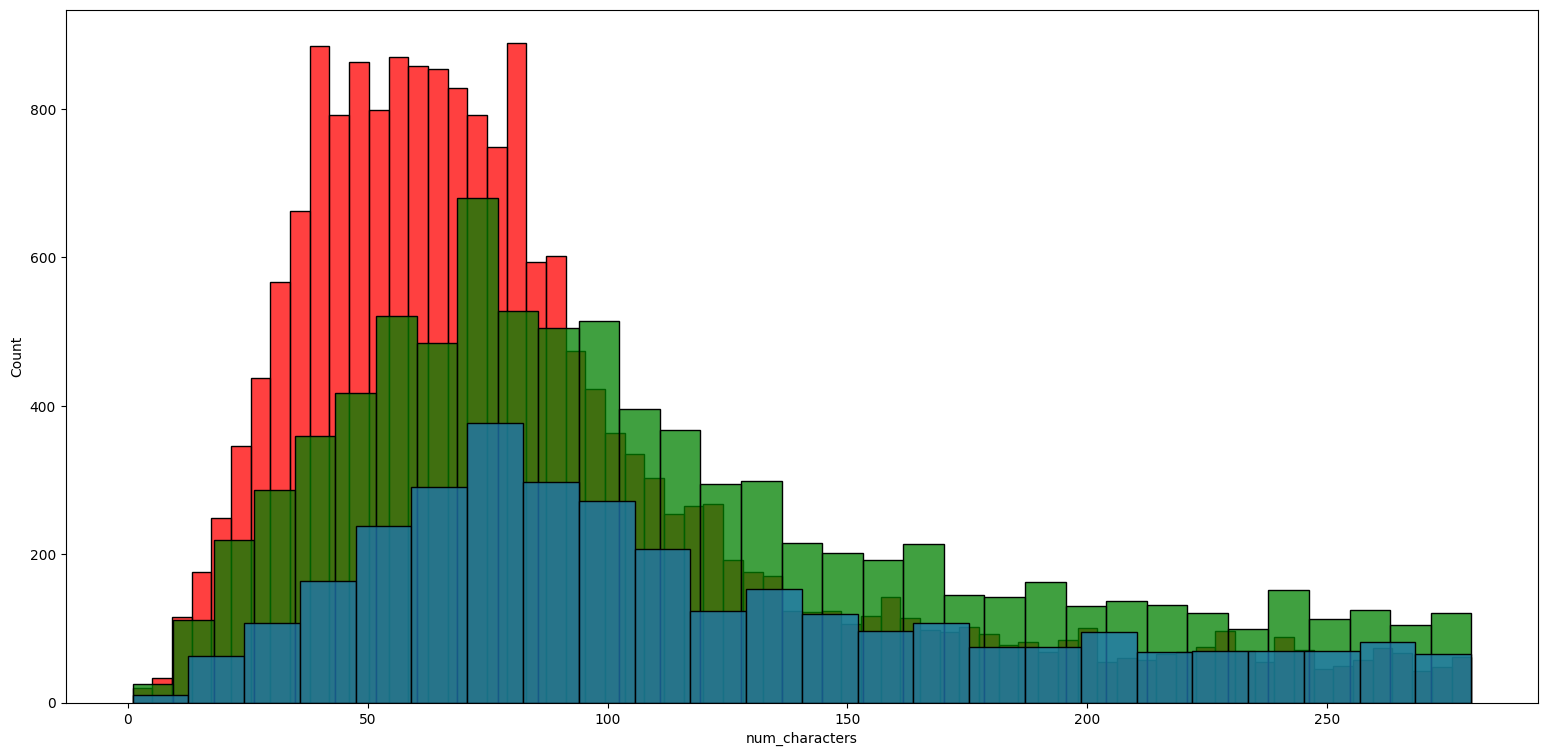

In [ ]:
plt.figure(figsize=(19,9))
sns.histplot(df[df['label']==1]['num_characters'],color='red')
sns.histplot(df[df['label']==2]['num_characters'],color='green')
sns.histplot(df[df['label']==0]['num_characters'])

In [28]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
from nltk.corpus import stopwords

In [30]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [32]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [35]:
df['transformed_text']=df['text'].apply(transform_text)

In [36]:
df.head()

,text,label,num_characters,transformed_text
0,"This film is absolutely awful, but nevertheles...",0,1676,film absolut aw nevertheless hilari time altho...
1,Well since seeing part's 1 through 3 I can hon...,0,717,well sinc see part 1 3 honestli say never made...
2,I got to see this film at a preview and was da...,1,1112,got see film preview dazzl typic romant comedi...
3,This adaptation positively butchers a classic ...,0,848,adapt posit butcher classic belov subtleti tim...
4,Råzone is an awful movie! It is so simple. It ...,0,1023,råzone aw movi simpl seem tri make movi show r...


In [37]:
from wordcloud import WordCloud

In [38]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [39]:
bad_wc=wc.generate(df[df['label']==0]['transformed_text'].str.cat(sep=""))

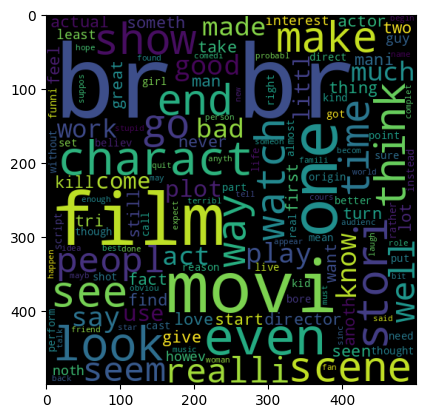

In [40]:
plt.imshow(bad_wc)

In [41]:
good_wc=wc.generate(df[df['label']==1]['transformed_text'].str.cat(sep=""))

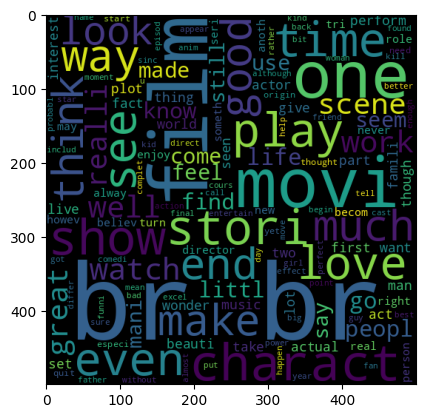

In [42]:
plt.imshow(good_wc)

In [43]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(df['transformed_text'],df['label'],test_size=0.3,random_state=0,shuffle=True)

In [46]:
x_train

,transformed_text
10085,seen everi episod spin thought first season de...
24460,got go almost one worst movi time aw act aw sc...
15583,film exceed expect thought heard go rubbish ex...
22666,boy oh boy oh golli gee br br interest thing m...
17077,ca figur anyon get budget movi bad like tv sta...
...,...
13154,pull guy gut butt spoof right one realli write...
19709,see half film school back novemb today saw fli...
9859,ca believ posit review movi thought one worst ...
10815,movi like bad train wreck horribl still contin...


In [47]:
y_train

,label
10085,0
24460,0
15583,1
22666,0
17077,0
...,...
13154,0
19709,0
9859,0
10815,0


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf_classifier=Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100))])

In [50]:
rf_classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [51]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [52]:
rf_pred=rf_classifier.predict(x_test)

In [53]:

confusion_matrix(y_test,rf_pred)

array([[3136,  586],
       [ 608, 3142]])

In [54]:
#Accuracy Score
accuracy_score(y_test,rf_pred)

0.840203426124197

In [55]:
#Classification Report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      3722
           1       0.84      0.84      0.84      3750

    accuracy                           0.84      7472
   macro avg       0.84      0.84      0.84      7472
weighted avg       0.84      0.84      0.84      7472



In [58]:
# Predict a real message
rf_classifier.predict(["i love the movie but kind off lenthy but i suggest u to watch the movie"])

array([1])